In [ ]:
## Лабораторная работа №2

## Загрузка библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_wine
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.metrics import *
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

## 1)
# Загрузка датасета
wine = load_wine()

# Получение данных
data = wine.data
# Создание df
feature_names = wine['feature_names']
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])
df = pd.DataFrame(data, columns = feature_names, index = wine_names)
df['target'] = wine.target

# 5 первых и 5 последних строк
first_5_rows = df.head()
last_5_rows = df.tail()
print(first_5_rows)
print(last_5_rows)

       alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
Wine0    14.23        1.71  2.43               15.6      127.0           2.80   
Wine1    13.20        1.78  2.14               11.2      100.0           2.65   
Wine2    13.16        2.36  2.67               18.6      101.0           2.80   
Wine3    14.37        1.95  2.50               16.8      113.0           3.85   
Wine4    13.24        2.59  2.87               21.0      118.0           2.80   

       flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
Wine0        3.06                  0.28             2.29             5.64   
Wine1        2.76                  0.26             1.28             4.38   
Wine2        3.24                  0.30             2.81             5.68   
Wine3        3.49                  0.24             2.18             7.80   
Wine4        2.69                  0.39             1.82             4.32   

        hue  od280/od315_of_diluted_wines  proline

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, Wine0 to Wine177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  ta

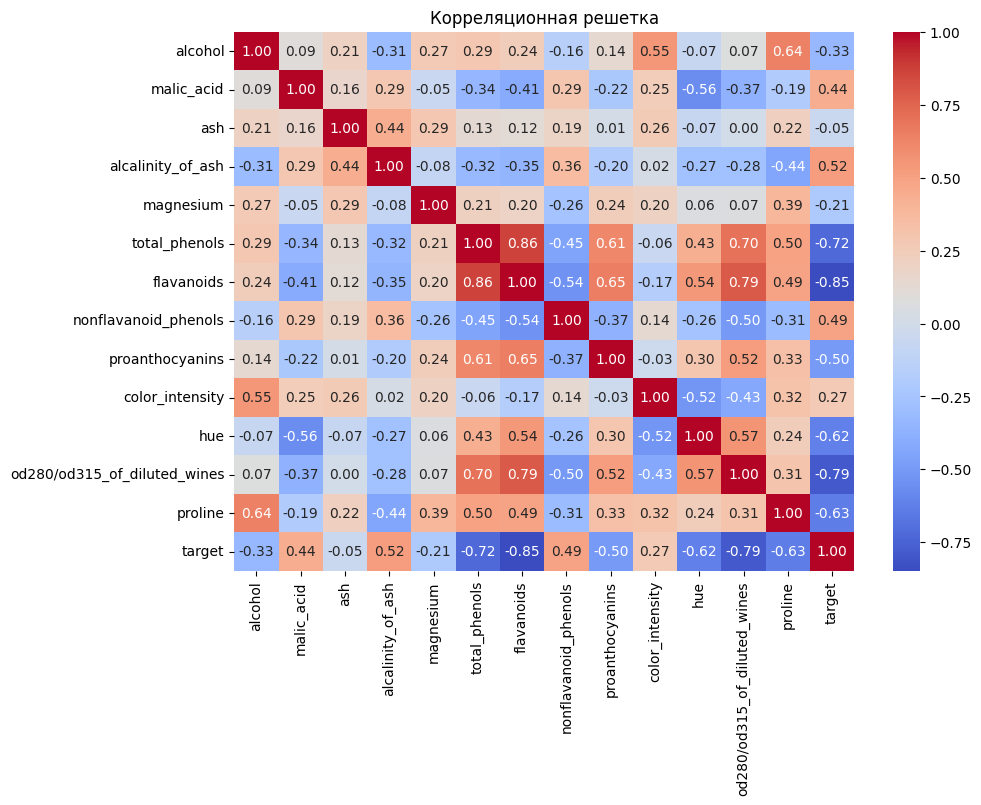

In [ ]:
## 2)
print(df.info())
# В таблице wine содержится информация о винах, в которой представлено 13 столбцов от "alcohol" до "proline". Общее
# количество записей составляет 178 вин. Все значения в таблице представлены в формате данных float и не содержат пустых значений
print(df.describe())
# описательная статистика выводит: (количество, среднее, стандартное отклонение, минимум, процентили (25%, 50% и 75%)  и максимум)
# Проход по каждому столбцу в DataFrame
for column in df.columns:
    # тест Шапиро-Уилка
    stat, p_value = shapiro(df[column])

    # Вывод
    print(f'Столбец {column}:')
    print(f' p-значение: {p_value}')

    # Оценика нормальности распределения
    alpha = 0.05
    if p_value > alpha:
        print('Распределение нормальное')
    else:
        print('Распределение не является нормальным')

# распределение большинства признаков в данных не является нормальным значения alpha < 0.05
# c нормальным распределением оказался столбец: alcalinity_of_ash

# # Создание корреляционной матрицы
correlation_matrix = df.corr()
# Визуализация корреляционной решетки
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная решетка')
plt.show()

# заметная положительная корреляция наблюдается у proline  и alcohol (0.643720), total_phenols и flavanoids (0.864564),
# flavanoids и od280/od315_of_diluted_wines (0.787194),
# заметная отрицательная корреляция наблюдается hue и malic_acid (-0.561296), color_intensity и hue (-0.521813 )


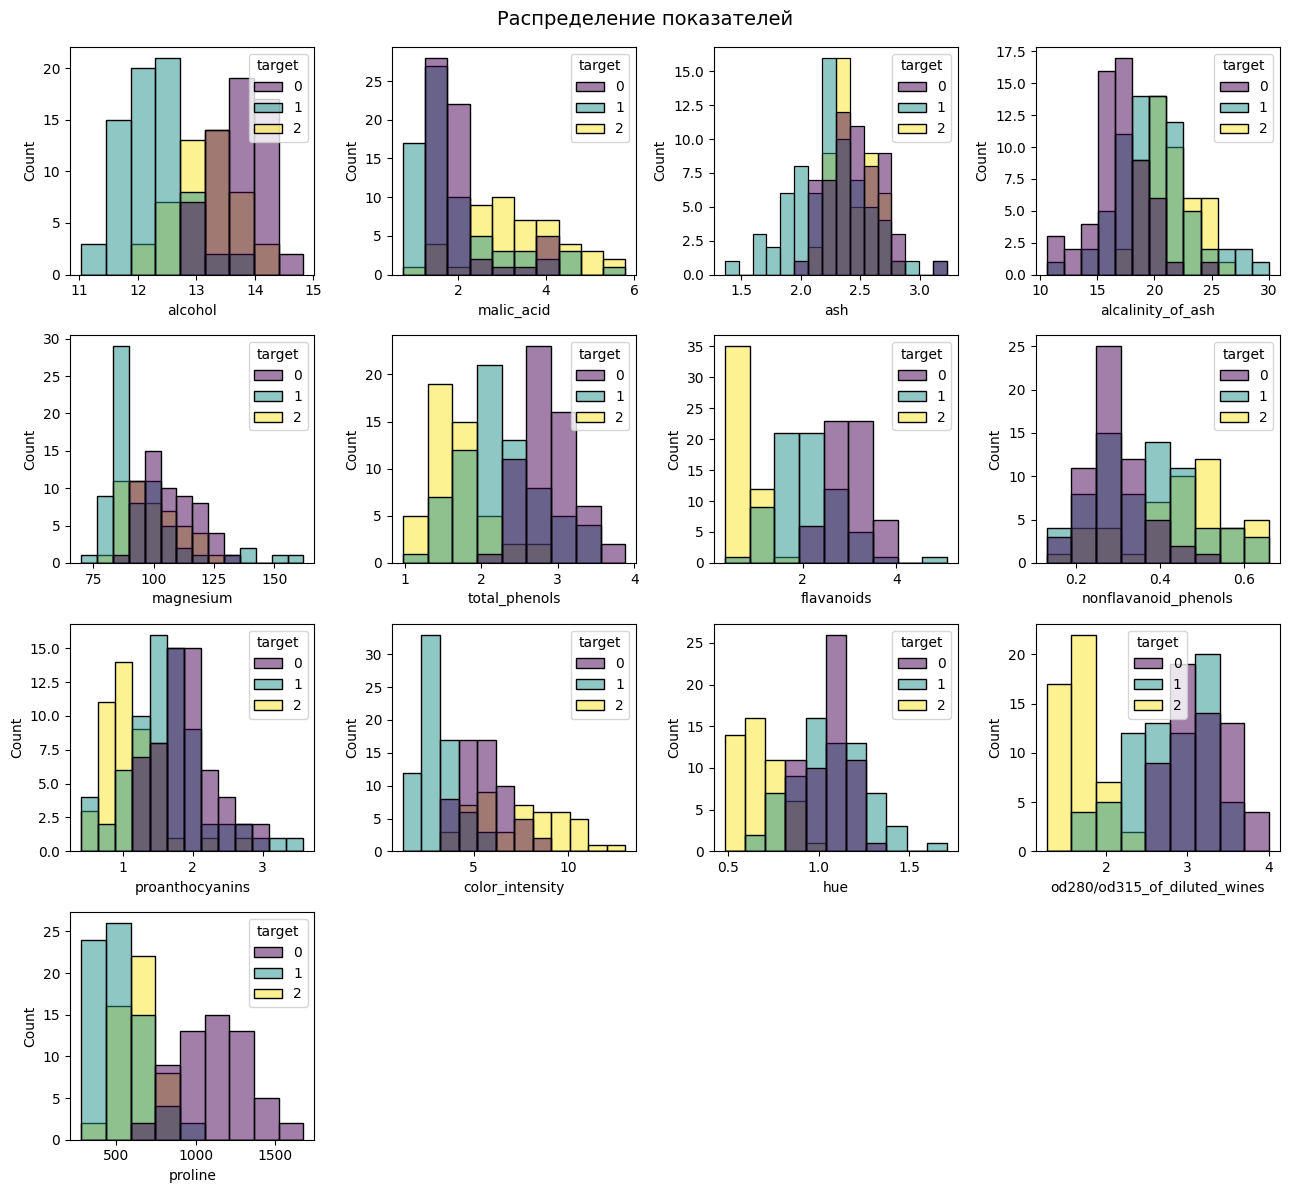

In [ ]:
## 3)
# Визуализация гистрограмм
# Визуализация распределение показателей
plt.figure(figsize=(13, 12))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df, x=col, hue='target', palette='viridis')
plt.suptitle('Распределение показателей', fontsize=14, y=0.99)
plt.tight_layout()
plt.show()


In [ ]:
## 4)
# # Разделение данных на обучающий и тестовый наборы 80% данных на обучение, 20% на тестирование
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров наборов
print('Размер обучающего набора:', X_train.shape)
print('Размер тест. набора:', X_test.shape)

Размер обучающего набора: (142, 13)
Размер тест. набора: (36, 13)


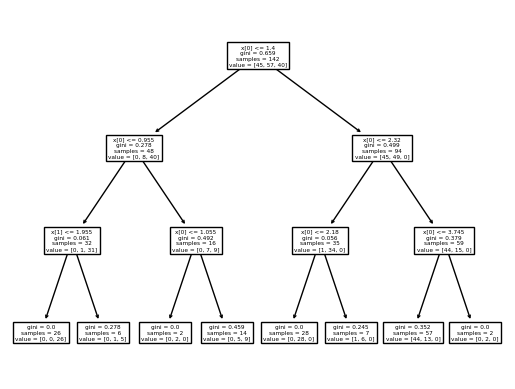

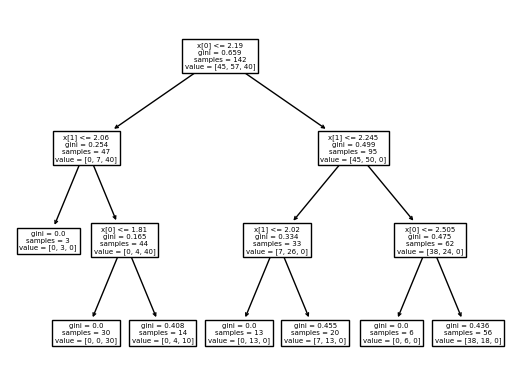

метрики коррелирующих признаков:
F1 score: 0.7429032258064515
Accuracy: 0.75
Precision: 0.7473262032085563
Recall: 0.75
Метрики не коррелирующих признаков:
F1 score: 0.7555555555555555
Accuracy: 0.75
Precision: 0.7664835164835164
Recall: 0.75


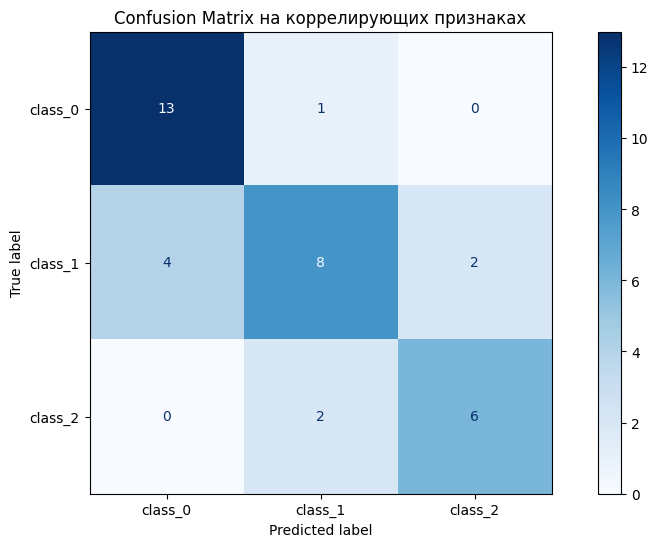

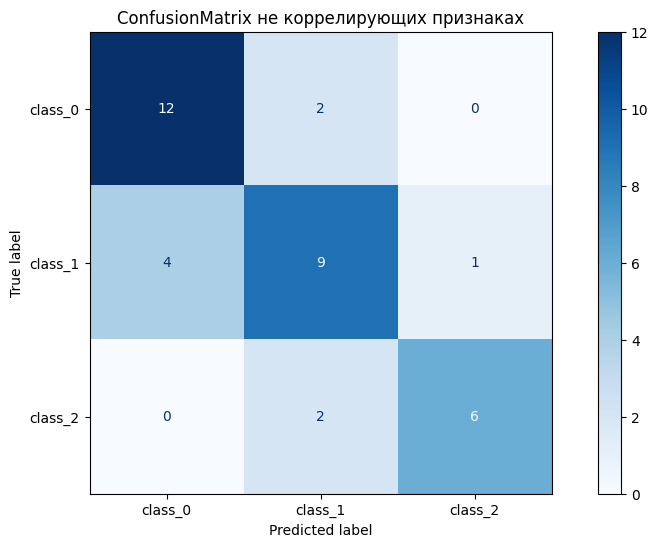

In [ ]:
## 5)
# Обучение decision tree на 2-х самых коррелирующих признаках и не коррелирующих
# Самые коррелирующие признаки (flavanoids и total_phenols)
# Не коррелирующие признаки (od280/od315_of_diluted_wines и ash)

#коррелирующие признаки
dt_corr = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=3)
dt_corr.fit(X_train[['flavanoids', 'total_phenols']], y_train)
tree.plot_tree(dt_corr)
plt.show()

#не коррелирующие признаки
dt_nocorr = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=3)
dt_nocorr.fit(X_train[['od280/od315_of_diluted_wines', 'ash']], y_train)
tree.plot_tree(dt_nocorr)
plt.show()

#метрики (f1 score, accuracy, precision, recall) для обеих моделей
y_pred_corr = dt_corr.predict(X_test[['flavanoids', 'total_phenols']])
y_pred_nocorr = dt_nocorr.predict(X_test[['od280/od315_of_diluted_wines', 'ash']])

print('метрики коррелирующих признаков:')
print('F1 score:', f1_score(y_test, y_pred_corr, average='macro'))
print('Accuracy:', accuracy_score(y_test, y_pred_corr))
print('Precision:', precision_score(y_test, y_pred_corr, average='macro'))
print('Recall:', recall_score(y_test, y_pred_corr, average='macro'))
# Метрики коррелирующих признаков: >= 0.74, что значит модель достаточно хорошо определяет классы
# и минимизирует ложноположительные и ложноотрицательные результаты

print('Метрики не коррелирующих признаков:')
print('F1 score:', f1_score(y_test, y_pred_nocorr, average='macro'))
print('Accuracy:', accuracy_score(y_test, y_pred_nocorr))
print('Precision:', precision_score(y_test, y_pred_nocorr, average='macro'))
print('Recall:', recall_score(y_test, y_pred_nocorr, average='macro'))
# Метрики не коррелирующих признаков: >= 0.75, что значит модель достаточно хорошо определяет классы
# и минимизирует ложноположительные и ложноотрицательные результаты

#ConfusionMatrix
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
cm_corr = confusion_matrix(y_test, y_pred_corr)
disp_corr = ConfusionMatrixDisplay(cm_corr, display_labels=wine.target_names)
disp_corr.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix на коррелирующих признаках')
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
cm_nocorr = confusion_matrix(y_test, y_pred_nocorr)
disp_nocorr = ConfusionMatrixDisplay(cm_nocorr, display_labels=wine.target_names)
disp_nocorr.plot(cmap='Blues', ax=plt.gca())
plt.title('ConfusionMatrix не коррелирующих признаках')
plt.show()

Метрики для модели RandomForest:
F1 score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


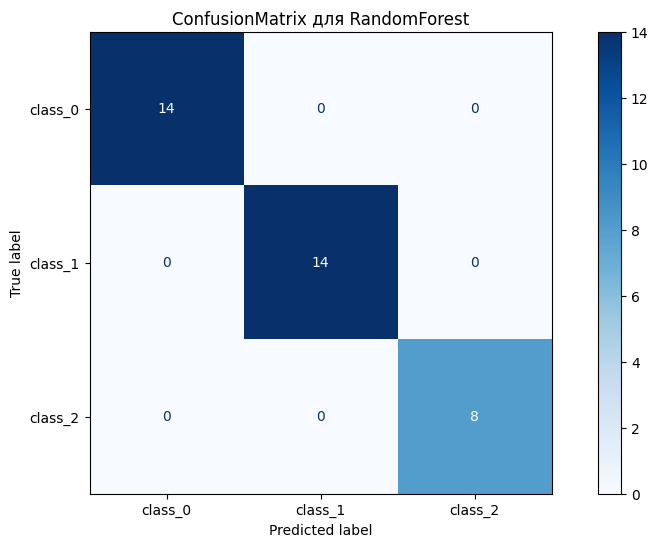

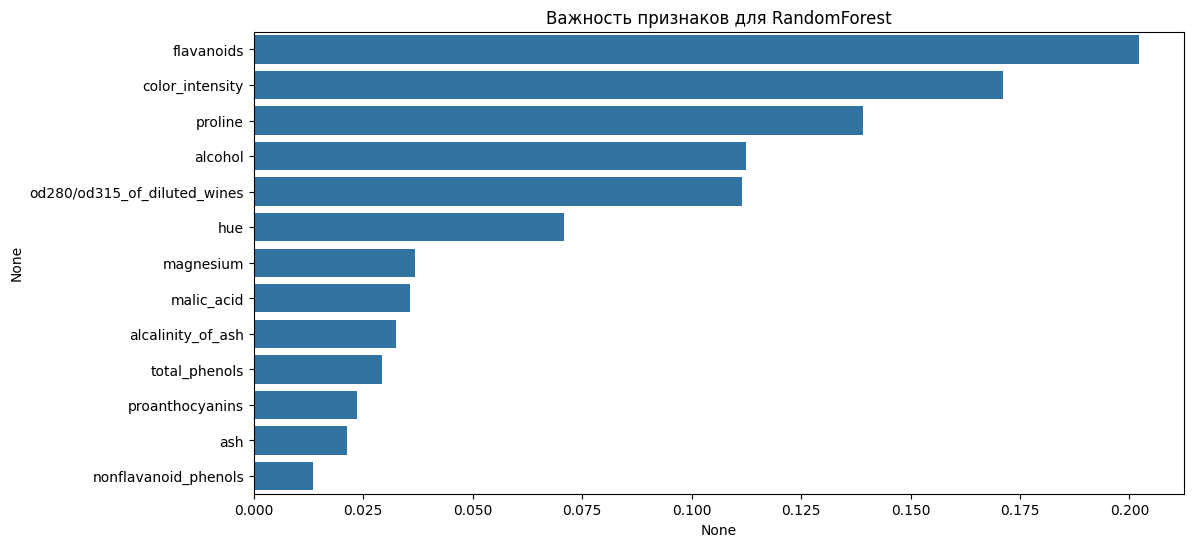

In [ ]:
## 6)

#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Метрики для модели RandomForest:')
print('F1 score:', f1_score(y_test, y_pred_rf, average='macro'))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf, average='macro'))
print('Recall:', recall_score(y_test, y_pred_rf, average='macro'))
#Accuracy, Precision и Recall равны 1.0, что означает точное предсказание модели

# ConfusionMatrix для модели RandomForest
plt.figure(figsize=(12,6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=wine.target_names)
disp_rf.plot(cmap='Blues', ax=plt.gca())
plt.title('ConfusionMatrix для RandomForest')
plt.show()

# Важность признака для RandomForest
plt.figure(figsize=(12, 6))
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp_rf, y=feat_imp_rf.index)
plt.title('Важность признаков для RandomForest')
plt.show()

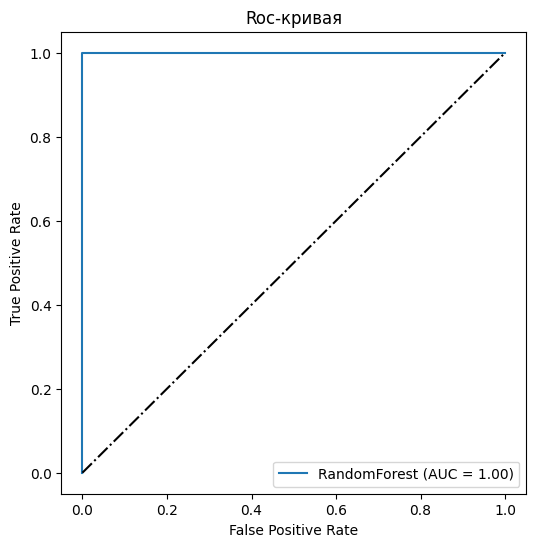

In [ ]:
$# 7)
#Roc-кривая
plt.figure(figsize=(6, 6))
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label='RandomForest (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], 'k-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc-кривая')
plt.legend()
plt.show()